In [ ]:
from IPython.display import clear_output
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:

!pip install ultralytics
!pip install gdown
clear_output(wait=False)

In [ ]:
import cv2
from IPython.display import Image
import numpy as np
from ultralytics import YOLO
import os
import shutil
import random
from PIL import Image


In [ ]:
!gdown 1IUB__JPaBj3XEtfeIVr5Tlg_SD5rwa05
!gdown 1fy8dI-2dKPJprlZlZIB_XM0gh9LqL_Cn
!gdown --id 1QxipseJnt1y5enieUUh16k22Vuhr7E6S

clear_output(wait=False)

### Upzip Files

In [ ]:
!mkdir datasets
!tar -xvf /content/training.gzip.tar -C /content/datasets
!tar -xvf /content/validation.gzip.tar -C /content/datasets

clear_output(wait=False)

In [ ]:
# Set the paths for the training and validation directories
train_dir = '/content/datasets/training'
val_dir = '/content/datasets/val'

# Create the validation directory if it doesn't already exist
if not os.path.exists(val_dir):
    os.makedirs(val_dir)

# Set the percentage of data to move to the validation directory
val_pct = 0.15

# Get the list of image files in the training directory
image_files = [f for f in os.listdir(train_dir) if f.endswith('.jpg')]

# Calculate the number of images to move to the validation directory
num_val_images = int(len(image_files) * val_pct)

# Randomly select the images to move
val_image_files = random.sample(image_files, num_val_images)

# Move the selected images and their corresponding labels to the validation directory
for image_file in val_image_files:
    # Move the image file
    src_path = os.path.join(train_dir, image_file)
    dst_path = os.path.join(val_dir, image_file)
    shutil.move(src_path, dst_path)

    # Move the corresponding label file
    label_file = image_file.replace('.jpg', '.txt')
    src_path = os.path.join(train_dir, label_file)
    dst_path = os.path.join(val_dir, label_file)
    shutil.move(src_path, dst_path)

In [ ]:
cd ./datasets

/content/datasets


In [ ]:
ls

training/  val/  validation/


In [ ]:
val_dir = '/content/datasets/val'
num_files = len([f for f in os.listdir(val_dir) if os.path.isfile(os.path.join(val_dir, f))])
print("Number of files in", val_dir, ":", num_files)

Number of files in /content/datasets/val : 1200


In [ ]:
val_dir = '/content/datasets/training'
num_files = len([f for f in os.listdir(val_dir) if os.path.isfile(os.path.join(val_dir, f))])
print("Number of files in", val_dir, ":", num_files)

Number of files in /content/datasets/training : 6800


In [ ]:
val_dir = '/content/datasets/val'
num_txt_files = len([f for f in os.listdir(val_dir) if f.endswith('.txt')])
print("Number of .txt files in", val_dir, ":", num_txt_files)

Number of .txt files in /content/datasets/val : 600


In [ ]:
train_dir = '/content/datasets/training'
new_train_dir = '/content/datasets/train'

# Rename the directory
shutil.move(train_dir, new_train_dir)

# Verify that the directory was renamed
if os.path.exists(new_train_dir):
    print(train_dir, "was renamed to", new_train_dir)
else:
    print("Failed to rename", train_dir)

/content/datasets/training was renamed to /content/datasets/train


In [ ]:
train_dir = '/content/datasets/validation'
new_train_dir = '/content/datasets/test'

# Rename the directory
shutil.move(train_dir, new_train_dir)

# Verify that the directory was renamed
if os.path.exists(new_train_dir):
    print(train_dir, "was renamed to", new_train_dir)
else:
    print("Failed to rename", train_dir)

/content/datasets/validation was renamed to /content/datasets/test


In [ ]:
test_dir = '/content/datasets/test'
num_txt_files = len([f for f in os.listdir(test_dir) if f.endswith('.txt')])
print("Number of .txt files in", test_dir, ":", num_txt_files)

Number of .txt files in /content/datasets/test : 1000


In [ ]:
with open('/content/data.yaml', 'w') as f:
    f.write('# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]\n')
    f.write('path: /content/datasets  # dataset root dir\n')
    f.write('train: train  # train images (relative to \'path\')\n')
    f.write('val: val  # val images (relative to \'path\')\n')
    f.write('test: test\n')
    f.write('\n')
    f.write('# Classes\n')
    f.write('names:\n')
    f.write('  0: car\n')
    f.write('  1: truck\n')
    f.write('  2: van\n')
    f.write('  3: longvehicle\n')
    f.write('  4: bus\n')
    f.write('  5: airliner\n')
    f.write('  6: propeller\n')
    f.write('  7: trainer\n')
    f.write('  8: chartered\n')
    f.write('  9: fighter\n')
    f.write('  10: other\n')
    f.write('  11: stairtruck\n')
    f.write('  12: pushbacktruck\n')
    f.write('  13: helicopter\n')
    f.write('  14: boat\n')

In [ ]:
cat /content/data.yaml

# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
path: /content/datasets  # dataset root dir
train: train  # train images (relative to 'path')
val: val  # val images (relative to 'path')
test: test

# Classes
names:
  0: car
  1: truck
  2: van
  3: longvehicle
  4: bus
  5: airliner
  6: propeller
  7: trainer
  8: chartered
  9: fighter
  10: other
  11: stairtruck
  12: pushbacktruck
  13: helicopter
  14: boat


# Yolo8

In [ ]:
# Load a model
model = YOLO("yolov8s.yaml")  # build a new model from scratch

# Use the model
results = model.train(data="/content/data.yaml", epochs=10, imgsz=1024, rect=True, batch=8)  # train the model


                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256

In [ ]:
# Set the directory path
directory = "/content/datasets/test"
# Get a list of all .jpg files in the directory
jpg_files = [f for f in os.listdir(directory) if f.endswith('.jpg')]
random_img_list = []
for i in range (0,5):
  random_jpg = random.choice(jpg_files)
  random_img_list.append(random_jpg)
random_img_list

['1794.jpg', '4867.jpg', '4923.jpg', '3972.jpg', '4977.jpg']

In [ ]:
def random_prediction(model, random_jpg):
  from PIL import Image
  # Print the random .jpg file name
  print('Predicting for image : {}'.format(random_jpg))
  # from PIL
  im1 = Image.open("/content/datasets/test/{}".format(random_jpg))
  results = model.predict(source=im1, save=True)  # save plotted images
  #print(results)
  display(Image.open('runs/detect/predict/{}'.format(random_jpg)))
  folder_path = "runs/detect/predict/"

  if os.path.exists(folder_path):
      # Remove the directory and its contents recursively
      os.system("rm -rf " + folder_path)
      print("Folder removed successfully.")
  else:
      print("Folder does not exist.")

In [ ]:
random_img_list = []
random_img_list.append('0550.jpg')
random_img_list.append('1713.jpg')
random_img_list.append('4561.jpg')
random_img_list.append('3170.jpg')
random_img_list.append('0320.jpg')


0: 768x1024 14 cars, 1 van, 26.2ms
Speed: 3.6ms preprocess, 26.2ms inference, 2.5ms postprocess per image at shape (1, 3, 768, 1024)
Results saved to runs/detect/predict


Predicting for image : 1713.jpg


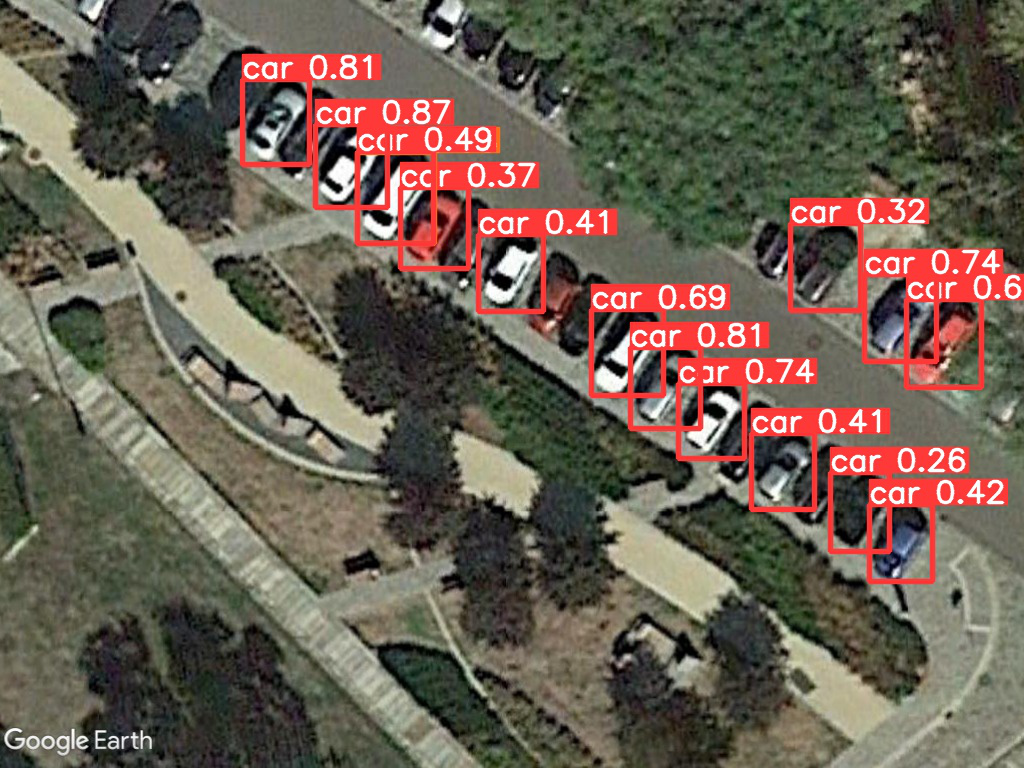

Folder removed successfully.


In [ ]:
random_prediction(model, random_img_list[1])

In [ ]:
def valtotest():
  with open('/content/data.yaml', 'w') as f:
      f.write('# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]\n')
      f.write('path: /content/datasets  # dataset root dir\n')
      f.write('train: train  # train images (relative to \'path\')\n')
      f.write('val: test  # val images (relative to \'path\')\n')
      f.write('test: val\n')
      f.write('\n')
      f.write('# Classes\n')
      f.write('names:\n')
      f.write('  0: car\n')
      f.write('  1: truck\n')
      f.write('  2: van\n')
      f.write('  3: longvehicle\n')
      f.write('  4: bus\n')
      f.write('  5: airliner\n')
      f.write('  6: propeller\n')
      f.write('  7: trainer\n')
      f.write('  8: chartered\n')
      f.write('  9: fighter\n')
      f.write('  10: other\n')
      f.write('  11: stairtruck\n')
      f.write('  12: pushbacktruck\n')
      f.write('  13: helicopter\n')
      f.write('  14: boat\n')

def valtoval():
  with open('/content/data.yaml', 'w') as f:
      f.write('# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]\n')
      f.write('path: /content/datasets  # dataset root dir\n')
      f.write('train: train  # train images (relative to \'path\')\n')
      f.write('val: val  # val images (relative to \'path\')\n')
      f.write('test: test\n')
      f.write('\n')
      f.write('# Classes\n')
      f.write('names:\n')
      f.write('  0: car\n')
      f.write('  1: truck\n')
      f.write('  2: van\n')
      f.write('  3: longvehicle\n')
      f.write('  4: bus\n')
      f.write('  5: airliner\n')
      f.write('  6: propeller\n')
      f.write('  7: trainer\n')
      f.write('  8: chartered\n')
      f.write('  9: fighter\n')
      f.write('  10: other\n')
      f.write('  11: stairtruck\n')
      f.write('  12: pushbacktruck\n')
      f.write('  13: helicopter\n')
      f.write('  14: boat\n')

In [ ]:
valtotest()
metrics = model.val()

Ultralytics YOLOv8.0.130 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
val: Scanning /content/datasets/test... 1000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1000/1000 [00:00<00:00, 1174.13it/s]
val: New cache created: /content/datasets/test.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 125/125 [00:35<00:00,  3.50it/s]
                   all       1000       9726      0.552      0.366      0.269      0.174
                   car       1000       4263      0.488      0.825      0.645      0.455
                 truck       1000        545      0.307      0.593      0.416      0.292
                   van       1000       1023      0.216      0.604      0.245       0.18
           longvehicle       1000        270      0.373      0.385      0.383       0.22
                   bus       1000        411      0.324      0.406      0.267      0.176
              airliner       1000        207       0

In [ ]:
valtoval()
# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered

Ultralytics YOLOv8.0.130 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
val: Scanning /content/datasets/val.cache... 600 images, 0 backgrounds, 0 corrupt: 100%|██████████| 600/600 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 75/75 [00:21<00:00,  3.43it/s]
                   all        600       5428      0.513      0.383      0.247      0.156
                   car        600       2714      0.482      0.827      0.645       0.45
                 truck        600        353      0.262      0.632      0.377      0.215
                   van        600        723      0.229      0.661      0.304      0.224
           longvehicle        600        206      0.384      0.481      0.356      0.212
                   bus        600        203      0.194      0.448      0.222      0.143
              airliner        600         97      0.186          1      0.733      0.429
             propeller    

In [ ]:
print('metrics.box.map : {}'.format(metrics.box.map)) # map50-95
print('metrics.box.map50 : {}'.format(metrics.box.map50)) # map50
print('metrics.box.map75 : {}'.format(metrics.box.map75)) # map75
print('metrics.box.maps : {}'.format(metrics.box.maps)) # a list contains map50-95 of each category

metrics.box.map : 0.15639857089481055
metrics.box.map50 : 0.24696378858393978
metrics.box.map75 : 0.1782564585054289
metrics.box.maps : [     0.4497     0.21511     0.22402     0.21214     0.14283     0.42937    0.068025     0.12614      0.2609   0.0070738   0.0082085    0.010904   0.0012437   0.0079417     0.18238]


In [ ]:
# Validate the model
metrics = model.predict('/content/datasets/val') # no arguments needed, dataset and settings remembered


image 1/600 /content/datasets/val/0003.jpg: 768x1024 3 cars, 26.1ms
image 2/600 /content/datasets/val/0008.jpg: 768x1024 1 car, 26.1ms
image 3/600 /content/datasets/val/0029.jpg: 768x1024 1 airliner, 26.2ms
image 4/600 /content/datasets/val/0041.jpg: 768x1024 (no detections), 26.1ms
image 5/600 /content/datasets/val/0044.jpg: 768x1024 2 cars, 26.4ms
image 6/600 /content/datasets/val/0056.jpg: 768x1024 2 airliners, 24.9ms
image 7/600 /content/datasets/val/0058.jpg: 768x1024 1 airliner, 24.1ms
image 8/600 /content/datasets/val/0075.jpg: 768x1024 1 car, 24.1ms
image 9/600 /content/datasets/val/0084.jpg: 768x1024 1 car, 1 van, 1 bus, 24.1ms
image 10/600 /content/datasets/val/0102.jpg: 768x1024 1 car, 22.2ms
image 11/600 /content/datasets/val/0104.jpg: 768x1024 1 car, 19.9ms
image 12/600 /content/datasets/val/0118.jpg: 768x1024 5 airliners, 19.9ms
image 13/600 /content/datasets/val/0140.jpg: 768x1024 3 airliners, 19.8ms
image 14/600 /content/datasets/val/0148.jpg: 768x1024 (no detections),

In [ ]:
# Validate the model
metrics = model.predict('/content/datasets/test') # no arguments needed, dataset and settings remembered


image 1/1000 /content/datasets/test/0011.jpg: 768x1024 2 airliners, 15.2ms
image 2/1000 /content/datasets/test/0013.jpg: 768x1024 4 cars, 15.5ms
image 3/1000 /content/datasets/test/0014.jpg: 768x1024 1 car, 2 airliners, 15.5ms
image 4/1000 /content/datasets/test/0015.jpg: 768x1024 1 airliner, 15.3ms
image 5/1000 /content/datasets/test/0020.jpg: 768x1024 1 airliner, 16.0ms
image 6/1000 /content/datasets/test/0023.jpg: 768x1024 1 airliner, 16.0ms
image 7/1000 /content/datasets/test/0025.jpg: 768x1024 1 airliner, 16.6ms
image 8/1000 /content/datasets/test/0033.jpg: 768x1024 2 cars, 15.8ms
image 9/1000 /content/datasets/test/0035.jpg: 768x1024 2 cars, 1 truck, 1 van, 10 buss, 16.1ms
image 10/1000 /content/datasets/test/0036.jpg: 768x1024 4 trucks, 16.0ms
image 11/1000 /content/datasets/test/0042.jpg: 768x1024 (no detections), 16.0ms
image 12/1000 /content/datasets/test/0045.jpg: 768x1024 3 cars, 15.8ms
image 13/1000 /content/datasets/test/0049.jpg: 768x1024 (no detections), 16.3ms
image 1

# Yolo5

In [ ]:
cd /content

/content


In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [ ]:
cd /content/yolov5

/content/yolov5


In [ ]:
!pip install -r requirements.txt  # install
clear_output(wait=False)

In [ ]:
cd /content/

/content


In [ ]:
!python /content/yolov5/train.py --img 640 --batch 8 --epochs 10 --data /content/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-193-g485da42 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv

In [ ]:
valtotest()
!python /content/yolov5/val.py --data /content/data.yaml  --weights /content/yolov5/runs/train/exp/weights/best.pt --task val --device 0

val: data=/content/data.yaml, weights=['/content/yolov5/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-193-g485da42 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7050580 parameters, 0 gradients, 15.9 GFLOPs
val: Scanning /content/datasets/test... 1000 images, 0 backgrounds, 0 corrupt: 100% 1000/1000 [00:03<00:00, 324.07it/s]
val: New cache created: /content/datasets/test.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 32/32 [00:37<00:00,  1.17s/it]
                   all       1000       9726      0.778      0.481      0.527      0.399
                   car       1000       4263      

In [ ]:
valtoval()
!python /content/yolov5/val.py --data /content/data.yaml  --weights /content/yolov5/runs/train/exp/weights/best.pt --task val --device 0

val: data=/content/data.yaml, weights=['/content/yolov5/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-193-g485da42 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7050580 parameters, 0 gradients, 15.9 GFLOPs
val: Scanning /content/datasets/val.cache... 600 images, 0 backgrounds, 0 corrupt: 100% 600/600 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 19/19 [00:22<00:00,  1.20s/it]
                   all        600       4998      0.831      0.468      0.523       0.39
                   car        600       2170      0.737      0.909      0.905      0.667
                 truc

In [ ]:
# Set the directory path
directory = "/content/datasets/test"
# Get a list of all .jpg files in the directory
jpg_files = [f for f in os.listdir(directory) if f.endswith('.jpg')]


In [ ]:
random_jpg = random.choice(jpg_files)

In [ ]:
# Set the directory path
directory = "/content/datasets/test"
# Get a list of all .jpg files in the directory
jpg_files = [f for f in os.listdir(directory) if f.endswith('.jpg')]

def random_prediction2(random_jpg):
  from PIL import Image
  # Print the random .jpg file name
  print('Predicting for image : {}'.format(random_jpg))
  # from PIL
  im1 = Image.open("/content/datasets/test/{}".format(random_jpg))
  !python /content/yolov5/detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --source "/content/datasets/test/{random_jpg}" --device 0
  #print(results)
  # Load the image file
  img = Image.open('/content/yolov5/runs/detect/exp/{}'.format(random_jpg))

  # Get the size of the image
  img_size = img.size
  # from PIL
  im1 = Image.open("/content/datasets/test/{}".format(random_jpg))
  display(Image.open('/content/yolov5/runs/detect/exp/{}'.format(random_jpg)))
  folder_path = "yolov5/runs/detect/exp"

  if os.path.exists(folder_path):
      # Remove the directory and its contents recursively
      os.system("rm -rf " + folder_path)
      print("Folder removed successfully.")
  else:
      print("Folder does not exist.")

Predicting for image : 1713.jpg
detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/datasets/test/1713.jpg, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-193-g485da42 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7050580 parameters, 0 gradients, 15.9 GFLOPs
image 1/1 /content/datasets/test/1713.jpg: 480x640 14 cars, 2 vans, 45.4ms
Speed: 0.6ms pre-process, 45.4ms inference, 1.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5/runs/detect/exp


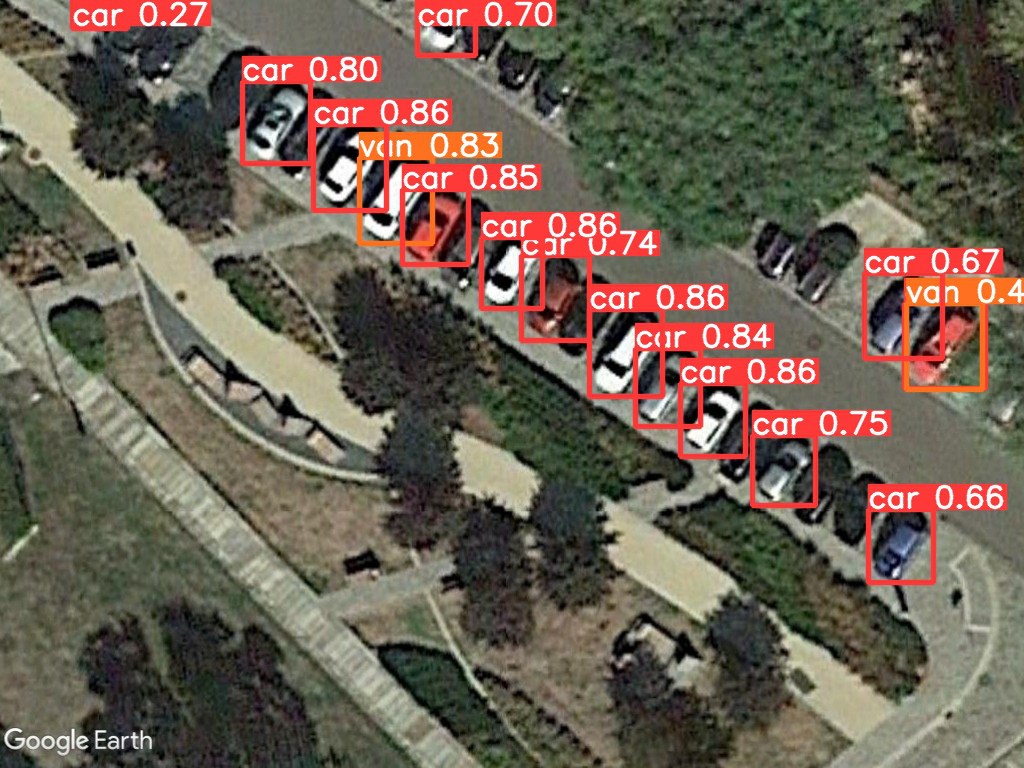

Folder removed successfully.


In [ ]:
random_prediction2(random_img_list[1])

# Yolov6

In [ ]:
cd /content

/content


In [ ]:
!git clone https://github.com/meituan/YOLOv6.git
clear_output(wait=False)

In [ ]:
def valtoval6():
  with open('/content/YOLOv6/data/dataset.yaml', 'w') as f:
    f.write('# Please insure that your custom_dataset are put in same parent dir with YOLOv6_DIR\n')
    f.write('train: /content/datasets/train # train images\n')
    f.write('val: /content/datasets/val # val images\n')
    f.write('test: /content/datasets/test # test images (optional)\n')
    f.write('\n')
    f.write('# whether it is coco dataset, only coco dataset should be set to True.\n')
    f.write('is_coco: False\n')
    f.write('# Classes\n')
    f.write('nc: 15  # number of classes\n')
    f.write("""names: ['car', 'truck', 'van', 'longvehicle', 'bus', 'airliner', 'propeller', 'trainer', 'chartered', 'fighter', 'other', 'stairtruck',
        'pushbacktruck', 'helicopter', 'boat']  # class names \n""")

def valtotest6():
  with open('/content/YOLOv6/data/dataset.yaml', 'w') as f:
    f.write('# Please insure that your custom_dataset are put in same parent dir with YOLOv6_DIR\n')
    f.write('train: /content/datasets/train # train images\n')
    f.write('val: /content/datasets/test # val images\n')
    f.write('test: /content/datasets/val # test images (optional)\n')
    f.write('\n')
    f.write('# whether it is coco dataset, only coco dataset should be set to True.\n')
    f.write('is_coco: False\n')
    f.write('# Classes\n')
    f.write('nc: 15  # number of classes\n')
    f.write("""names: ['car', 'truck', 'van', 'longvehicle', 'bus', 'airliner', 'propeller', 'trainer', 'chartered', 'fighter', 'other', 'stairtruck',
        'pushbacktruck', 'helicopter', 'boat']  # class names \n""")
valtoval6()

In [ ]:
cat /content/YOLOv6/data/dataset.yaml

# Please insure that your custom_dataset are put in same parent dir with YOLOv6_DIR
train: /content/datasets/train # train images
val: /content/datasets/val # val images
test: /content/datasets/test # test images (optional)

# whether it is coco dataset, only coco dataset should be set to True.
is_coco: False
# Classes
nc: 15  # number of classes
names: ['car', 'truck', 'van', 'longvehicle', 'bus', 'airliner', 'propeller', 'trainer', 'chartered', 'fighter', 'other', 'stairtruck',
        'pushbacktruck', 'helicopter', 'boat']  # class names 


In [ ]:
cd /content/YOLOv6

/content/YOLOv6


In [ ]:
!pip install -r requirements.txt  # install
clear_output(wait=False)

## MobileNet

In [ ]:
# Be sure to open use_dfl mode in config file (use_dfl=True, reg_max=16) if you want to do self-distillation training further.
!python /content/YOLOv6/tools/train.py --batch 8 --epochs 10 --conf /content/YOLOv6/configs/yolov6l.py --data data/dataset.yaml --fuse_ab --device 0

Using 1 GPU for training... 
training args are: Namespace(data_path='data/dataset.yaml', conf_file='/content/YOLOv6/configs/yolov6l.py', img_size=640, rect=False, batch_size=8, epochs=10, workers=8, device='0', eval_interval=20, eval_final_only=False, heavy_eval_range=50, check_images=False, check_labels=False, output_dir='./runs/train', name='exp', dist_url='env://', gpu_count=0, local_rank=-1, resume=False, write_trainbatch_tb=False, stop_aug_last_n_epoch=15, save_ckpt_on_last_n_epoch=-1, distill=False, distill_feat=False, quant=False, calib=False, teacher_model_path=None, temperature=20, fuse_ab=True, bs_per_gpu=32, specific_shape=False, height=None, width=None, rank=-1, world_size=1, save_dir='runs/train/exp')

Downloading: "https://www.dropbox.com/s/47tyzpofuuyyv1b/mobilenetv2_1.0-f2a8633.pth.tar?dl=1" to /root/.cache/torch/hub/checkpoints/mobilenetv2_1.0-f2a8633.pth.tar
100% 13.5M/13.5M [00:00<00:00, 78.0MB/s]
Model: Model(
  (backbone): MobileNetV2(
    (features): Sequential(
 

In [ ]:
valtotest6()
!python /content/YOLOv6/tools/eval.py --data data/dataset.yaml  --weights /content/YOLOv6/runs/train/exp/weights/best_ckpt.pt --task val --device 0

Namespace(data='data/dataset.yaml', weights='/content/YOLOv6/runs/train/exp/weights/best_ckpt.pt', batch_size=32, img_size=640, conf_thres=0.03, iou_thres=0.65, task='val', device='0', half=False, save_dir='runs/val/', name='exp', shrink_size=0, infer_on_rect=True, reproduce_640_eval=False, eval_config_file='./configs/experiment/eval_640_repro.py', do_coco_metric=True, do_pr_metric=False, plot_curve=True, plot_confusion_matrix=False, verbose=False, config_file='', specific_shape=False, height=None, width=None)
Loading checkpoint from /content/YOLOv6/runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
Model Summary: Params: 18.73M, Gflops: 41.08
img record infomation path is:/content/datasets/.test_cache.json
Val: Checking formats of images with 2 process(es): 
0 image(s) corrupted: 100% 1000/1000 [00:00<00:00, 3089.11it/s]
Val: Checking formats of labels with 2 process(es): 
1000 label(s) found, 0 label(s) missing, 0 label(s) empty, 0 invalid label fil

In [ ]:
valtoval6()
!python /content/YOLOv6/tools/eval.py --data data/dataset.yaml  --weights /content/YOLOv6/runs/train/exp/weights/best_ckpt.pt --task val --device 0

Namespace(data='data/dataset.yaml', weights='/content/YOLOv6/runs/train/exp/weights/best_ckpt.pt', batch_size=32, img_size=640, conf_thres=0.03, iou_thres=0.65, task='val', device='0', half=False, save_dir='runs/val/', name='exp', shrink_size=0, infer_on_rect=True, reproduce_640_eval=False, eval_config_file='./configs/experiment/eval_640_repro.py', do_coco_metric=True, do_pr_metric=False, plot_curve=True, plot_confusion_matrix=False, verbose=False, config_file='', specific_shape=False, height=None, width=None)
Loading checkpoint from /content/YOLOv6/runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
Model Summary: Params: 18.73M, Gflops: 41.08
img record infomation path is:/content/datasets/.val_cache.json
Val: Checking formats of labels with 2 process(es): 
600 label(s) found, 0 label(s) missing, 0 label(s) empty, 0 invalid label files: 100% 600/600 [00:00<00:00, 3075.57it/s]
Convert to COCO format
100% 600/600 [00:00<00:00, 50811.31it/s]
Convert to 

In [ ]:
def random_prediction3(random_jpg):
  from PIL import Image
  # Print the random .jpg file name
  print('Predicting for image : {}'.format(random_jpg))
  # from PIL
  im1 = Image.open("/content/datasets/test/{}".format(random_jpg))
  !python tools/infer.py --weights /content/YOLOv6/runs/train/exp/weights/best_ckpt.pt --source '/content/datasets/test/{random_jpg}' --device 0

  # from PIL
  im1 = Image.open("/content/datasets/test/{}".format(random_jpg))
  display(Image.open('/content/YOLOv6/runs/inference/exp/{}'.format(random_jpg)))

  folder_path = "/content/YOLOv6/runs/inference/exp"

  if os.path.exists(folder_path):
      # Remove the directory and its contents recursively
      os.system("rm -rf " + folder_path)
      print("Folder removed successfully.")
  else:
      print("Folder does not exist.")

Predicting for image : 0980.jpg
Namespace(weights='/content/YOLOv6/runs/train/exp/weights/best_ckpt.pt', source='/content/datasets/test/0980.jpg', webcam=False, webcam_addr='0', yaml='data/coco.yaml', img_size=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device='0', save_txt=False, not_save_img=False, save_dir=None, view_img=False, classes=None, agnostic_nms=False, project='runs/inference', name='exp', hide_labels=False, hide_conf=False, half=False)
Loading checkpoint from /content/YOLOv6/runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
100% 1/1 [00:00<00:00,  7.89it/s]
Results saved to runs/inference/exp


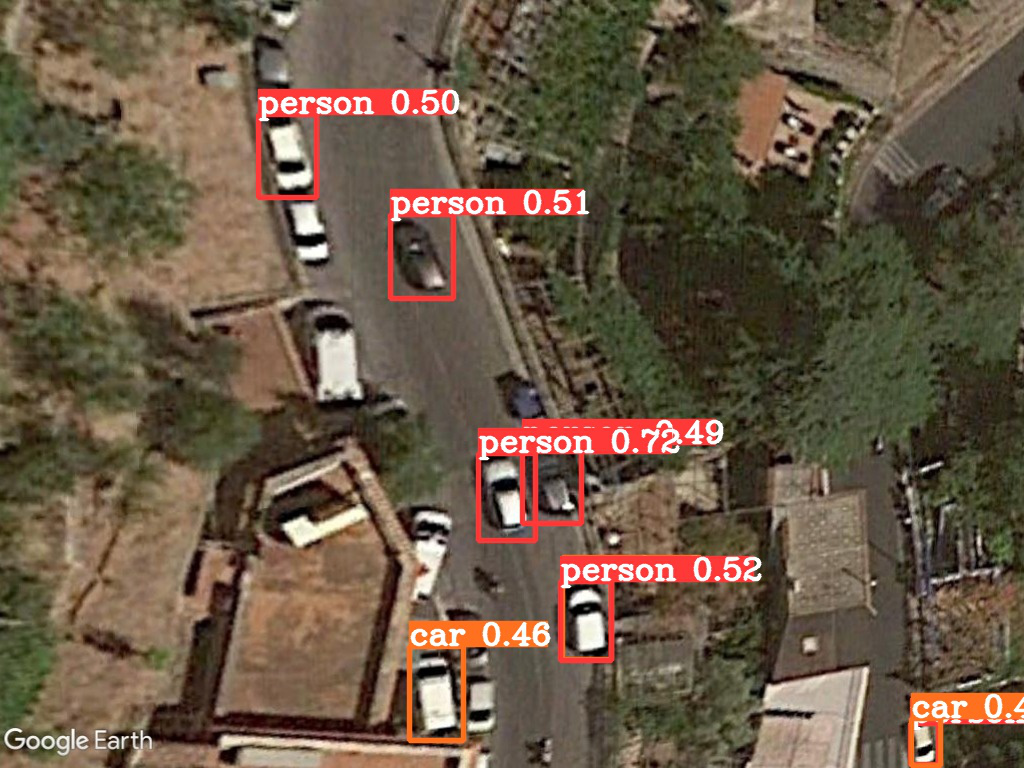

Folder removed successfully.


In [ ]:
random_prediction3(random_img_list[1])

## SqueezeNet

## SqueezeNet V1.1, Pretrained = False, Changes on Neck

In [ ]:
valtoval6()
# Be sure to open use_dfl mode in config file (use_dfl=True, reg_max=16) if you want to do self-distillation training further.
!python /content/YOLOv6/tools/train.py --batch 8 --epochs 10 --conf /content/YOLOv6/configs/yolov6s.py --data data/dataset.yaml --fuse_ab --device 0

Using 1 GPU for training... 
training args are: Namespace(data_path='data/dataset.yaml', conf_file='/content/YOLOv6/configs/yolov6s.py', img_size=640, rect=False, batch_size=8, epochs=10, workers=8, device='0', eval_interval=20, eval_final_only=False, heavy_eval_range=50, check_images=False, check_labels=False, output_dir='./runs/train', name='exp', dist_url='env://', gpu_count=0, local_rank=-1, resume=False, write_trainbatch_tb=False, stop_aug_last_n_epoch=15, save_ckpt_on_last_n_epoch=-1, distill=False, distill_feat=False, quant=False, calib=False, teacher_model_path=None, temperature=20, fuse_ab=True, bs_per_gpu=32, specific_shape=False, height=None, width=None, rank=-1, world_size=1, save_dir='runs/train/exp4')

Model: Model(
  (backbone): SqueezeNet(
    (conv1): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(2, 2))
    (relu1): ReLU(inplace=True)
    (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=True)
    (fire2): FireModule(
      (sq

In [ ]:
valtotest6()
!python /content/YOLOv6/tools/eval.py --data data/dataset.yaml  --weights /content/YOLOv6/runs/train/exp4/weights/best_ckpt.pt --task val --device 0

Namespace(data='data/dataset.yaml', weights='/content/YOLOv6/runs/train/exp4/weights/best_ckpt.pt', batch_size=32, img_size=640, conf_thres=0.03, iou_thres=0.65, task='val', device='0', half=False, save_dir='runs/val/', name='exp', shrink_size=0, infer_on_rect=True, reproduce_640_eval=False, eval_config_file='./configs/experiment/eval_640_repro.py', do_coco_metric=True, do_pr_metric=False, plot_curve=True, plot_confusion_matrix=False, verbose=False, config_file='', specific_shape=False, height=None, width=None)
Loading checkpoint from /content/YOLOv6/runs/train/exp4/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
Model Summary: Params: 22.08M, Gflops: 57.60
img record infomation path is:/content/datasets/.test_cache.json
Val: Checking formats of images with 2 process(es): 
0 image(s) corrupted: 100% 1000/1000 [00:01<00:00, 569.75it/s]
Val: Checking formats of labels with 2 process(es): 
1000 label(s) found, 0 label(s) missing, 0 label(s) empty, 0 invalid label fi

In [ ]:
valtoval6()
!python /content/YOLOv6/tools/eval.py --data data/dataset.yaml  --weights /content/YOLOv6/runs/train/exp4/weights/best_ckpt.pt --task val --device 0

Namespace(data='data/dataset.yaml', weights='/content/YOLOv6/runs/train/exp4/weights/best_ckpt.pt', batch_size=32, img_size=640, conf_thres=0.03, iou_thres=0.65, task='val', device='0', half=False, save_dir='runs/val/', name='exp', shrink_size=0, infer_on_rect=True, reproduce_640_eval=False, eval_config_file='./configs/experiment/eval_640_repro.py', do_coco_metric=True, do_pr_metric=False, plot_curve=True, plot_confusion_matrix=False, verbose=False, config_file='', specific_shape=False, height=None, width=None)
Loading checkpoint from /content/YOLOv6/runs/train/exp4/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
Model Summary: Params: 22.08M, Gflops: 57.60
img record infomation path is:/content/datasets/.val_cache.json
Val: Checking formats of labels with 2 process(es): 
600 label(s) found, 0 label(s) missing, 0 label(s) empty, 0 invalid label files: 100% 600/600 [00:00<00:00, 1886.09it/s]
Convert to COCO format
100% 600/600 [00:00<00:00, 44976.72it/s]
Convert t

In [ ]:
def random_prediction3(random_jpg):
  from PIL import Image
  # Print the random .jpg file name
  print('Predicting for image : {}'.format(random_jpg))
  # from PIL
  im1 = Image.open("/content/datasets/test/{}".format(random_jpg))
  !python tools/infer.py --weights /content/YOLOv6/runs/train/exp4/weights/best_ckpt.pt --source '/content/datasets/test/{random_jpg}' --device 0

  # from PIL
  im1 = Image.open("/content/datasets/test/{}".format(random_jpg))
  display(Image.open('/content/YOLOv6/runs/inference/exp/{}'.format(random_jpg)))

  folder_path = "/content/YOLOv6/runs/inference/exp"

  if os.path.exists(folder_path):
      # Remove the directory and its contents recursively
      os.system("rm -rf " + folder_path)
      print("Folder removed successfully.")
  else:
      print("Folder does not exist.")

Predicting for image : 1713.jpg
Namespace(weights='/content/YOLOv6/runs/train/exp4/weights/best_ckpt.pt', source='/content/datasets/test/1713.jpg', webcam=False, webcam_addr='0', yaml='data/coco.yaml', img_size=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device='0', save_txt=False, not_save_img=False, save_dir=None, view_img=False, classes=None, agnostic_nms=False, project='runs/inference', name='exp', hide_labels=False, hide_conf=False, half=False)
Loading checkpoint from /content/YOLOv6/runs/train/exp4/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
100% 1/1 [00:00<00:00,  7.32it/s]
Results saved to runs/inference/exp


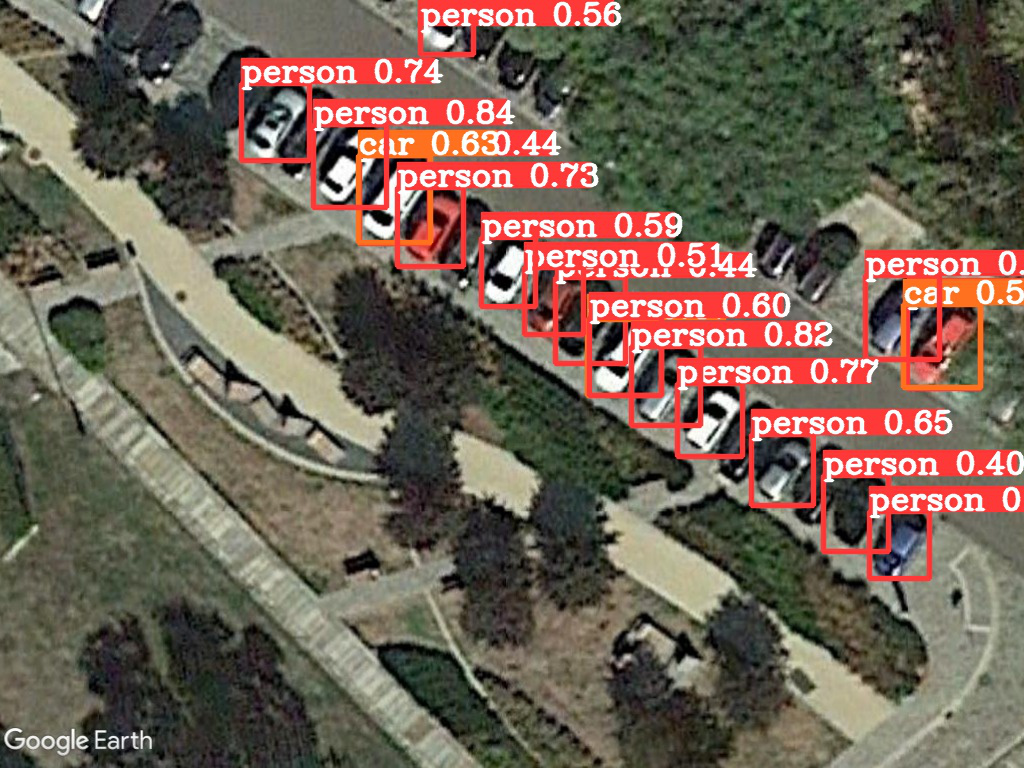

Folder removed successfully.


In [ ]:
random_prediction3(random_img_list[1])

# Large Model + SqueezeNet 1

## SqueezeNet V1, Pretrained = False, add padding and maxpool instead of changing Neck

In [ ]:
valtoval6()
# Be sure to open use_dfl mode in config file (use_dfl=True, reg_max=16) if you want to do self-distillation training further.
!python /content/YOLOv6/tools/train.py --batch 8 --epochs 10 --conf /content/YOLOv6/configs/yolov6l.py --data data/dataset.yaml --fuse_ab --device 0

Using 1 GPU for training... 
training args are: Namespace(data_path='data/dataset.yaml', conf_file='/content/YOLOv6/configs/yolov6l.py', img_size=640, rect=False, batch_size=8, epochs=10, workers=8, device='0', eval_interval=20, eval_final_only=False, heavy_eval_range=50, check_images=False, check_labels=False, output_dir='./runs/train', name='exp', dist_url='env://', gpu_count=0, local_rank=-1, resume=False, write_trainbatch_tb=False, stop_aug_last_n_epoch=15, save_ckpt_on_last_n_epoch=-1, distill=False, distill_feat=False, quant=False, calib=False, teacher_model_path=None, temperature=20, fuse_ab=True, bs_per_gpu=32, specific_shape=False, height=None, width=None, rank=-1, world_size=1, save_dir='runs/train/exp5')

Model: Model(
  (backbone): SqueezeNet(
    (conv1): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(2, 2))
    (relu1): ReLU(inplace=True)
    (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=True)
    (fire2): FireModule(
      (sq

In [ ]:
valtotest6()
!python /content/YOLOv6/tools/eval.py --data data/dataset.yaml  --weights /content/YOLOv6/runs/train/exp5/weights/best_ckpt.pt --task val --device 0

Namespace(data='data/dataset.yaml', weights='/content/YOLOv6/runs/train/exp5/weights/best_ckpt.pt', batch_size=32, img_size=640, conf_thres=0.03, iou_thres=0.65, task='val', device='0', half=False, save_dir='runs/val/', name='exp', shrink_size=0, infer_on_rect=True, reproduce_640_eval=False, eval_config_file='./configs/experiment/eval_640_repro.py', do_coco_metric=True, do_pr_metric=False, plot_curve=True, plot_confusion_matrix=False, verbose=False, config_file='', specific_shape=False, height=None, width=None)
Loading checkpoint from /content/YOLOv6/runs/train/exp5/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
Model Summary: Params: 22.08M, Gflops: 57.60
img record infomation path is:/content/datasets/.test_cache.json
Val: Checking formats of labels with 2 process(es): 
1000 label(s) found, 0 label(s) missing, 0 label(s) empty, 0 invalid label files: 100% 1000/1000 [00:00<00:00, 1959.16it/s]
Convert to COCO format
100% 1000/1000 [00:00<00:00, 36516.35it/s]
Con

In [ ]:
valtoval6()
!python /content/YOLOv6/tools/eval.py --data data/dataset.yaml  --weights /content/YOLOv6/runs/train/exp5/weights/best_ckpt.pt --task val --device 0

Namespace(data='data/dataset.yaml', weights='/content/YOLOv6/runs/train/exp5/weights/best_ckpt.pt', batch_size=32, img_size=640, conf_thres=0.03, iou_thres=0.65, task='val', device='0', half=False, save_dir='runs/val/', name='exp', shrink_size=0, infer_on_rect=True, reproduce_640_eval=False, eval_config_file='./configs/experiment/eval_640_repro.py', do_coco_metric=True, do_pr_metric=False, plot_curve=True, plot_confusion_matrix=False, verbose=False, config_file='', specific_shape=False, height=None, width=None)
Loading checkpoint from /content/YOLOv6/runs/train/exp5/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
Model Summary: Params: 22.08M, Gflops: 57.60
img record infomation path is:/content/datasets/.val_cache.json
Val: Checking formats of labels with 2 process(es): 
600 label(s) found, 0 label(s) missing, 0 label(s) empty, 0 invalid label files: 100% 600/600 [00:00<00:00, 1091.81it/s]
Convert to COCO format
100% 600/600 [00:00<00:00, 25285.68it/s]
Convert t

In [ ]:
def random_prediction3(random_jpg):
  from PIL import Image
  # Print the random .jpg file name
  print('Predicting for image : {}'.format(random_jpg))
  # from PIL
  im1 = Image.open("/content/datasets/test/{}".format(random_jpg))
  !python tools/infer.py --weights /content/YOLOv6/runs/train/exp5/weights/best_ckpt.pt --source '/content/datasets/test/{random_jpg}' --device 0

  # from PIL
  im1 = Image.open("/content/datasets/test/{}".format(random_jpg))
  display(Image.open('/content/YOLOv6/runs/inference/exp/{}'.format(random_jpg)))

  folder_path = "/content/YOLOv6/runs/inference/exp"

  if os.path.exists(folder_path):
      # Remove the directory and its contents recursively
      os.system("rm -rf " + folder_path)
      print("Folder removed successfully.")
  else:
      print("Folder does not exist.")

Predicting for image : 1713.jpg
Namespace(weights='/content/YOLOv6/runs/train/exp5/weights/best_ckpt.pt', source='/content/datasets/test/1713.jpg', webcam=False, webcam_addr='0', yaml='data/coco.yaml', img_size=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device='0', save_txt=False, not_save_img=False, save_dir=None, view_img=False, classes=None, agnostic_nms=False, project='runs/inference', name='exp', hide_labels=False, hide_conf=False, half=False)
Loading checkpoint from /content/YOLOv6/runs/train/exp5/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
100% 1/1 [00:00<00:00,  4.74it/s]
Results saved to runs/inference/exp


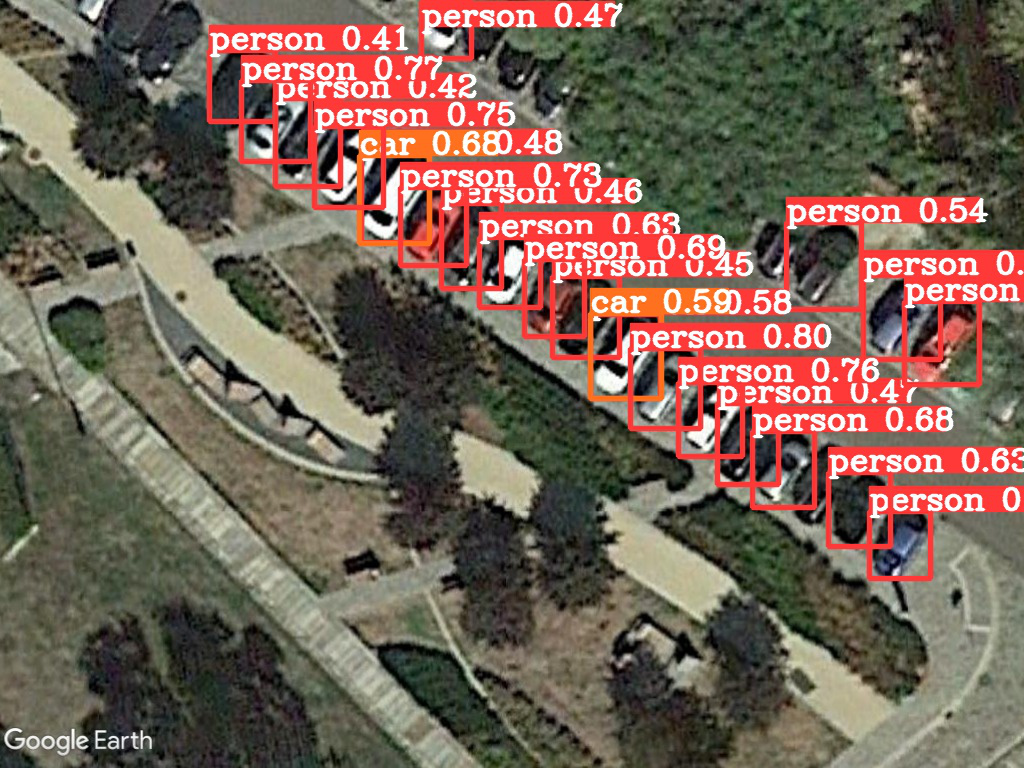

Folder removed successfully.


In [ ]:
random_prediction3(random_img_list[1])

In [ ]:
class SqueezeNet(nn.Module):
    def __init__(self, num_classes=1000):
        super(SqueezeNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 96, kernel_size=7, stride=2, padding=2)
        self.relu1 = nn.ReLU(inplace=True)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2, ceil_mode=True, padding=1)
        self.fire2 = FireModule(96, 16, 64, 64)
        self.fire3 = FireModule(128, 16, 64, 64)
        self.fire4 = FireModule(128, 32, 128, 128)
        self.maxpool2 = nn.MaxPool2d(kernel_size=1, stride=2, ceil_mode=True)
        self.fire5 = FireModule(256, 32, 128, 128)
        self.maxpool20 = nn.MaxPool2d(kernel_size=2, stride=1, ceil_mode=True)
        self.fire6 = FireModule(256, 48, 192, 192)
        self.fire7 = FireModule(384, 48, 192, 192)
        self.fire8 = FireModule(384, 64, 256, 256)
        self.maxpool3 = nn.MaxPool2d(kernel_size=3, stride=2, ceil_mode=True)
        self.fire9 = FireModule(512, 80, 512, 512)


    def forward(self, x):
        outputs = []
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)
        x = self.fire2(x)
        x = self.fire3(x)
        outputs.append(x)
        x = self.fire4(x)
        x = self.maxpool2(x)
        x = self.fire5(x)
        outputs.append(x)
        x = self.fire6(x)
        x = self.fire7(x)
        x = self.maxpool2(x)
        x = self.fire8(x)
        outputs.append(x)
        x = self.maxpool2(x)
        #x = self.maxpool3(x)
        x = self.fire9(x)
        #x = self.maxpool2(x)
        outputs.append(x)
        # Loop through the tuple and print the size of each tensor
        for tensor in outputs:
            print("Tensor size:", tensor.size())
        return tuple(outputs)

# MobileNet V2

In [ ]:
valtoval6()
# Be sure to open use_dfl mode in config file (use_dfl=True, reg_max=16) if you want to do self-distillation training further.
!python /content/YOLOv6/tools/train.py --batch 8 --epochs 10 --conf /content/YOLOv6/configs/yolov6s.py --data data/dataset.yaml --fuse_ab --device 0

Using 1 GPU for training... 
training args are: Namespace(data_path='data/dataset.yaml', conf_file='/content/YOLOv6/configs/yolov6s.py', img_size=640, rect=False, batch_size=8, epochs=10, workers=8, device='0', eval_interval=20, eval_final_only=False, heavy_eval_range=50, check_images=False, check_labels=False, output_dir='./runs/train', name='exp', dist_url='env://', gpu_count=0, local_rank=-1, resume=False, write_trainbatch_tb=False, stop_aug_last_n_epoch=15, save_ckpt_on_last_n_epoch=-1, distill=False, distill_feat=False, quant=False, calib=False, teacher_model_path=None, temperature=20, fuse_ab=True, bs_per_gpu=32, specific_shape=False, height=None, width=None, rank=-1, world_size=1, save_dir='runs/train/exp21')

Model: Model(
  (backbone): MobileNetV2(
    (features): Sequential(
      (0): Sequential(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=Tru

In [ ]:
valtoval6()
!python /content/YOLOv6/tools/eval.py --data data/dataset.yaml  --weights /content/YOLOv6/runs/train/exp21/weights/best_ckpt.pt --task val --device 0

Namespace(data='data/dataset.yaml', weights='/content/YOLOv6/runs/train/exp21/weights/best_ckpt.pt', batch_size=32, img_size=640, conf_thres=0.03, iou_thres=0.65, task='val', device='0', half=False, save_dir='runs/val/', name='exp', shrink_size=0, infer_on_rect=True, reproduce_640_eval=False, eval_config_file='./configs/experiment/eval_640_repro.py', do_coco_metric=True, do_pr_metric=False, plot_curve=True, plot_confusion_matrix=False, verbose=False, config_file='', specific_shape=False, height=None, width=None)
Loading checkpoint from /content/YOLOv6/runs/train/exp21/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
Model Summary: Params: 18.73M, Gflops: 41.08
img record infomation path is:/content/datasets/.val_cache.json
Val: Checking formats of labels with 2 process(es): 
600 label(s) found, 0 label(s) missing, 0 label(s) empty, 0 invalid label files: 100% 600/600 [00:00<00:00, 2824.81it/s]
Convert to COCO format
100% 600/600 [00:00<00:00, 36079.52it/s]
Convert

In [ ]:
valtotest6()
!python /content/YOLOv6/tools/eval.py --data data/dataset.yaml  --weights /content/YOLOv6/runs/train/exp21/weights/best_ckpt.pt --task val --device 0

Namespace(data='data/dataset.yaml', weights='/content/YOLOv6/runs/train/exp21/weights/best_ckpt.pt', batch_size=32, img_size=640, conf_thres=0.03, iou_thres=0.65, task='val', device='0', half=False, save_dir='runs/val/', name='exp', shrink_size=0, infer_on_rect=True, reproduce_640_eval=False, eval_config_file='./configs/experiment/eval_640_repro.py', do_coco_metric=True, do_pr_metric=False, plot_curve=True, plot_confusion_matrix=False, verbose=False, config_file='', specific_shape=False, height=None, width=None)
Loading checkpoint from /content/YOLOv6/runs/train/exp21/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
Model Summary: Params: 18.73M, Gflops: 41.08
img record infomation path is:/content/datasets/.test_cache.json
Val: Checking formats of labels with 2 process(es): 
1000 label(s) found, 0 label(s) missing, 0 label(s) empty, 0 invalid label files: 100% 1000/1000 [00:00<00:00, 2907.38it/s]
Convert to COCO format
100% 1000/1000 [00:00<00:00, 42951.54it/s]
C

In [ ]:
def random_prediction3(random_jpg):
  from PIL import Image
  # Print the random .jpg file name
  print('Predicting for image : {}'.format(random_jpg))
  # from PIL
  im1 = Image.open("/content/datasets/test/{}".format(random_jpg))
  !python tools/infer.py --weights /content/YOLOv6/runs/train/exp21/weights/best_ckpt.pt --source '/content/datasets/test/{random_jpg}' --device 0

  # from PIL
  im1 = Image.open("/content/datasets/test/{}".format(random_jpg))
  display(Image.open('/content/YOLOv6/runs/inference/exp/{}'.format(random_jpg)))

  folder_path = "/content/YOLOv6/runs/inference/exp"

  if os.path.exists(folder_path):
      # Remove the directory and its contents recursively
      os.system("rm -rf " + folder_path)
      print("Folder removed successfully.")
  else:
      print("Folder does not exist.")

Predicting for image : 1713.jpg
Namespace(weights='/content/YOLOv6/runs/train/exp21/weights/best_ckpt.pt', source='/content/datasets/test/1713.jpg', webcam=False, webcam_addr='0', yaml='data/coco.yaml', img_size=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device='0', save_txt=False, not_save_img=False, save_dir=None, view_img=False, classes=None, agnostic_nms=False, project='runs/inference', name='exp', hide_labels=False, hide_conf=False, half=False)
Loading checkpoint from /content/YOLOv6/runs/train/exp21/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
100% 1/1 [00:00<00:00,  4.44it/s]
Results saved to runs/inference/exp


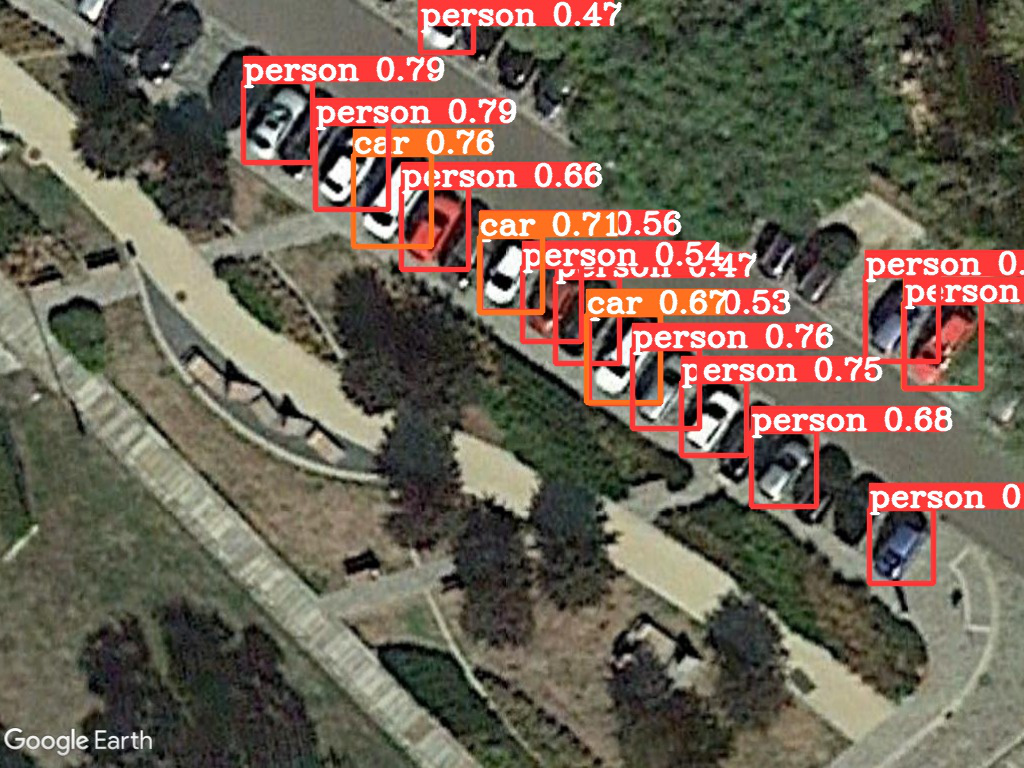

Folder removed successfully.


In [ ]:
random_prediction3(random_img_list[1])